In [1]:
from shapely.geometry import shape
import geopandas as gpd
import pandas as pd

# 讀取 JSON 文件
data = pd.read_json('../data/tw_village.json')

# 提取 features 欄位中的地理資訊和屬性
features = data['features']
properties = features.apply(lambda x: x['properties'])
geometries = features.apply(lambda x: shape(x['geometry']))

# 將屬性和幾何資料轉換為 GeoDataFrame
gdf = gpd.GeoDataFrame(properties, geometry=geometries)

gdf

,features,geometry
0,"{'VILLCODE': '10013030S01', 'COUNTYNAME': '屏東縣...","POLYGON ((120.44566 22.46442, 120.44557 22.464..."
1,"{'VILLCODE': '64000130006', 'COUNTYNAME': '高雄市...","POLYGON ((120.37531 22.50652, 120.37524 22.506..."
2,"{'VILLCODE': '10018010054', 'COUNTYNAME': '新竹市...","POLYGON ((121.02165 24.78572, 121.02164 24.785..."
3,"{'VILLCODE': '10018020045', 'COUNTYNAME': '新竹市...","POLYGON ((120.95554 24.80483, 120.95569 24.804..."
4,"{'VILLCODE': '64000130008', 'COUNTYNAME': '高雄市...","POLYGON ((120.38662 22.5002, 120.38652 22.5000..."
...,...,...
7754,"{'VILLCODE': '63000080024', 'COUNTYNAME': '臺北市...","POLYGON ((121.55705 24.99126, 121.55713 24.990..."
7755,"{'VILLCODE': '63000080026', 'COUNTYNAME': '臺北市...","POLYGON ((121.56311 24.98904, 121.56305 24.989..."
7756,"{'VILLCODE': '63000080003', 'COUNTYNAME': '臺北市...","POLYGON ((121.54052 24.99211, 121.54029 24.991..."
7757,"{'VILLCODE': '63000080027', 'COUNTYNAME': '臺北市...","POLYGON ((121.56866 24.99493, 121.56911 24.994..."


In [2]:
# 假設 gdf 是包含所有地理要素的 GeoDataFrame
# 提取 'features' 中的 '名稱' 欄位
gdf['名稱'] = gdf['features'].apply(lambda x: x['COUNTYNAME'])

# 定義六都名稱
six_metros = ['臺北市', '新北市', '桃園市', '臺中市', '臺南市', '高雄市']

# 使用 str.contains 篩選六都的資料
six_metros_gdf = gdf[gdf['名稱'].str.contains('|'.join(six_metros))]

# 查看篩選結果
six_metros_gdf


,features,geometry,名稱
1,"{'VILLCODE': '64000130006', 'COUNTYNAME': '高雄市...","POLYGON ((120.37531 22.50652, 120.37524 22.506...",高雄市
4,"{'VILLCODE': '64000130008', 'COUNTYNAME': '高雄市...","POLYGON ((120.38662 22.5002, 120.38652 22.5000...",高雄市
5,"{'VILLCODE': '64000100010', 'COUNTYNAME': '高雄市...","POLYGON ((120.29828 22.57723, 120.29826 22.577...",高雄市
6,"{'VILLCODE': '64000100013', 'COUNTYNAME': '高雄市...","POLYGON ((120.29626 22.57583, 120.29626 22.575...",高雄市
45,"{'VILLCODE': '66000110029', 'COUNTYNAME': '臺中市...","POLYGON ((120.62485 24.41319, 120.62485 24.413...",臺中市
...,...,...,...
7754,"{'VILLCODE': '63000080024', 'COUNTYNAME': '臺北市...","POLYGON ((121.55705 24.99126, 121.55713 24.990...",臺北市
7755,"{'VILLCODE': '63000080026', 'COUNTYNAME': '臺北市...","POLYGON ((121.56311 24.98904, 121.56305 24.989...",臺北市
7756,"{'VILLCODE': '63000080003', 'COUNTYNAME': '臺北市...","POLYGON ((121.54052 24.99211, 121.54029 24.991...",臺北市
7757,"{'VILLCODE': '63000080027', 'COUNTYNAME': '臺北市...","POLYGON ((121.56866 24.99493, 121.56911 24.994...",臺北市


In [4]:
import matplotlib.pyplot as plt

df_population = pd.read_csv("../data/popularity_village_111.csv")

# 移除 '村里代碼' 中的 "-" 符號
df_population['村里代碼'] = df_population['村里代碼'].str.replace('-', '')

six_metros_gdf['VILLCODE'] = six_metros_gdf['features'].apply(lambda x: x['VILLCODE'])

# 合併資料
six_metros_gdf = six_metros_gdf.merge(df_population, left_on='VILLCODE', right_on='村里代碼', how='left')

# 輸出篩選結果為 GeoJSON 檔案
output_geojson = '../geojson/tw_village_111.geojson'
six_metros_gdf.to_file(output_geojson, driver='GeoJSON')

d:\Anaconda\envs\intern\lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [47]:
six_metros_gdf

,features,geometry,名稱,VILLCODE,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,村里代碼,村里名稱,性比例,戶量,人口密度,扶養比,扶幼比,扶老比,老化指數,資料時間
0,"{'VILLCODE': '64000130006', 'COUNTYNAME': '高雄市...","POLYGON ((120.37531 22.50652, 120.37524 22.506...",高雄市,64000130006,64000.0,高雄市,64000130.0,林園區,64000130006,中門里,106.31,2.47,1322.68,36.90,12.32,24.58,199.60,111Y06M
1,"{'VILLCODE': '64000130008', 'COUNTYNAME': '高雄市...","POLYGON ((120.38662 22.5002, 120.38652 22.5000...",高雄市,64000130008,64000.0,高雄市,64000130.0,林園區,64000130008,港埔里,106.71,2.44,1531.92,37.24,12.07,25.17,208.52,111Y06M
2,"{'VILLCODE': '64000100010', 'COUNTYNAME': '高雄市...","POLYGON ((120.29828 22.57723, 120.29826 22.577...",高雄市,64000100010,64000.0,高雄市,64000100.0,旗津區,64000100010,上竹里,108.64,2.30,2732.38,38.94,13.13,25.81,196.58,111Y06M
3,"{'VILLCODE': '64000100013', 'COUNTYNAME': '高雄市...","POLYGON ((120.29626 22.57583, 120.29626 22.575...",高雄市,64000100013,64000.0,高雄市,64000100.0,旗津區,64000100013,中興里,98.37,2.67,1051.94,38.58,13.26,25.32,191.01,111Y06M
4,"{'VILLCODE': '66000110029', 'COUNTYNAME': '臺中市...","POLYGON ((120.62485 24.41319, 120.62485 24.413...",臺中市,66000110029,66000.0,臺中市,66000110.0,大甲區,66000110029,建興里,106.95,3.36,253.75,40.48,15.48,25.00,161.50,111Y06M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,"{'VILLCODE': '63000080024', 'COUNTYNAME': '臺北市...","POLYGON ((121.55705 24.99126, 121.55713 24.990...",臺北市,63000080024,63000.0,臺北市,63000080.0,文山區,63000080024,華興里,92.62,2.41,14048.56,43.70,18.55,25.15,135.56,111Y06M
4278,"{'VILLCODE': '63000080026', 'COUNTYNAME': '臺北市...","POLYGON ((121.56311 24.98904, 121.56305 24.989...",臺北市,63000080026,63000.0,臺北市,63000080.0,文山區,63000080026,明興里,92.45,2.34,31034.57,36.62,13.04,23.59,180.91,111Y06M
4279,"{'VILLCODE': '63000080003', 'COUNTYNAME': '臺北市...","POLYGON ((121.54052 24.99211, 121.54029 24.991...",臺北市,63000080003,63000.0,臺北市,63000080.0,文山區,63000080003,景美里,87.49,2.47,25359.54,56.37,25.25,31.11,123.21,111Y06M
4280,"{'VILLCODE': '63000080027', 'COUNTYNAME': '臺北市...","POLYGON ((121.56866 24.99493, 121.56911 24.994...",臺北市,63000080027,63000.0,臺北市,63000080.0,文山區,63000080027,木柵里,88.37,2.38,15769.43,44.86,16.61,28.26,170.12,111Y06M


In [5]:
df_population = pd.read_csv("../data/popularity_village_111.csv")

# 移除 '村里代碼' 中的 "-" 符號
df_population['村里代碼'] = df_population['村里代碼'].str.replace('-', '')

gdf['VILLCODE'] = gdf['features'].apply(lambda x: x['VILLCODE'])

# 合併資料
gdf = gdf.merge(df_population, left_on='VILLCODE', right_on='村里代碼', how='left')

# 輸出篩選結果為 GeoJSON 檔案
output_geojson = '../geojson/tw_village_all_111.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')

d:\Anaconda\envs\intern\lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [49]:
gdf

,features,geometry,名稱,VILLCODE,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,村里代碼,村里名稱,性比例,戶量,人口密度,扶養比,扶幼比,扶老比,老化指數,資料時間
0,"{'VILLCODE': '10013030S01', 'COUNTYNAME': '屏東縣...","POLYGON ((120.44566 22.46442, 120.44557 22.464...",屏東縣,10013030S01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'VILLCODE': '64000130006', 'COUNTYNAME': '高雄市...","POLYGON ((120.37531 22.50652, 120.37524 22.506...",高雄市,64000130006,64000.0,高雄市,64000130.0,林園區,64000130006,中門里,106.31,2.47,1322.68,36.90,12.32,24.58,199.60,111Y06M
2,"{'VILLCODE': '10018010054', 'COUNTYNAME': '新竹市...","POLYGON ((121.02165 24.78572, 121.02164 24.785...",新竹市,10018010054,10018.0,新竹市,10018010.0,東區,10018010054,關新里,101.41,2.46,44950.13,52.39,47.64,4.75,9.97,111Y06M
3,"{'VILLCODE': '10018020045', 'COUNTYNAME': '新竹市...","POLYGON ((120.95554 24.80483, 120.95569 24.804...",新竹市,10018020045,10018.0,新竹市,10018020.0,北區,10018020045,中雅里,90.75,2.33,28039.91,49.93,28.64,21.29,74.35,111Y06M
4,"{'VILLCODE': '64000130008', 'COUNTYNAME': '高雄市...","POLYGON ((120.38662 22.5002, 120.38652 22.5000...",高雄市,64000130008,64000.0,高雄市,64000130.0,林園區,64000130008,港埔里,106.71,2.44,1531.92,37.24,12.07,25.17,208.52,111Y06M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,"{'VILLCODE': '63000080024', 'COUNTYNAME': '臺北市...","POLYGON ((121.55705 24.99126, 121.55713 24.990...",臺北市,63000080024,63000.0,臺北市,63000080.0,文山區,63000080024,華興里,92.62,2.41,14048.56,43.70,18.55,25.15,135.56,111Y06M
7755,"{'VILLCODE': '63000080026', 'COUNTYNAME': '臺北市...","POLYGON ((121.56311 24.98904, 121.56305 24.989...",臺北市,63000080026,63000.0,臺北市,63000080.0,文山區,63000080026,明興里,92.45,2.34,31034.57,36.62,13.04,23.59,180.91,111Y06M
7756,"{'VILLCODE': '63000080003', 'COUNTYNAME': '臺北市...","POLYGON ((121.54052 24.99211, 121.54029 24.991...",臺北市,63000080003,63000.0,臺北市,63000080.0,文山區,63000080003,景美里,87.49,2.47,25359.54,56.37,25.25,31.11,123.21,111Y06M
7757,"{'VILLCODE': '63000080027', 'COUNTYNAME': '臺北市...","POLYGON ((121.56866 24.99493, 121.56911 24.994...",臺北市,63000080027,63000.0,臺北市,63000080.0,文山區,63000080027,木柵里,88.37,2.38,15769.43,44.86,16.61,28.26,170.12,111Y06M


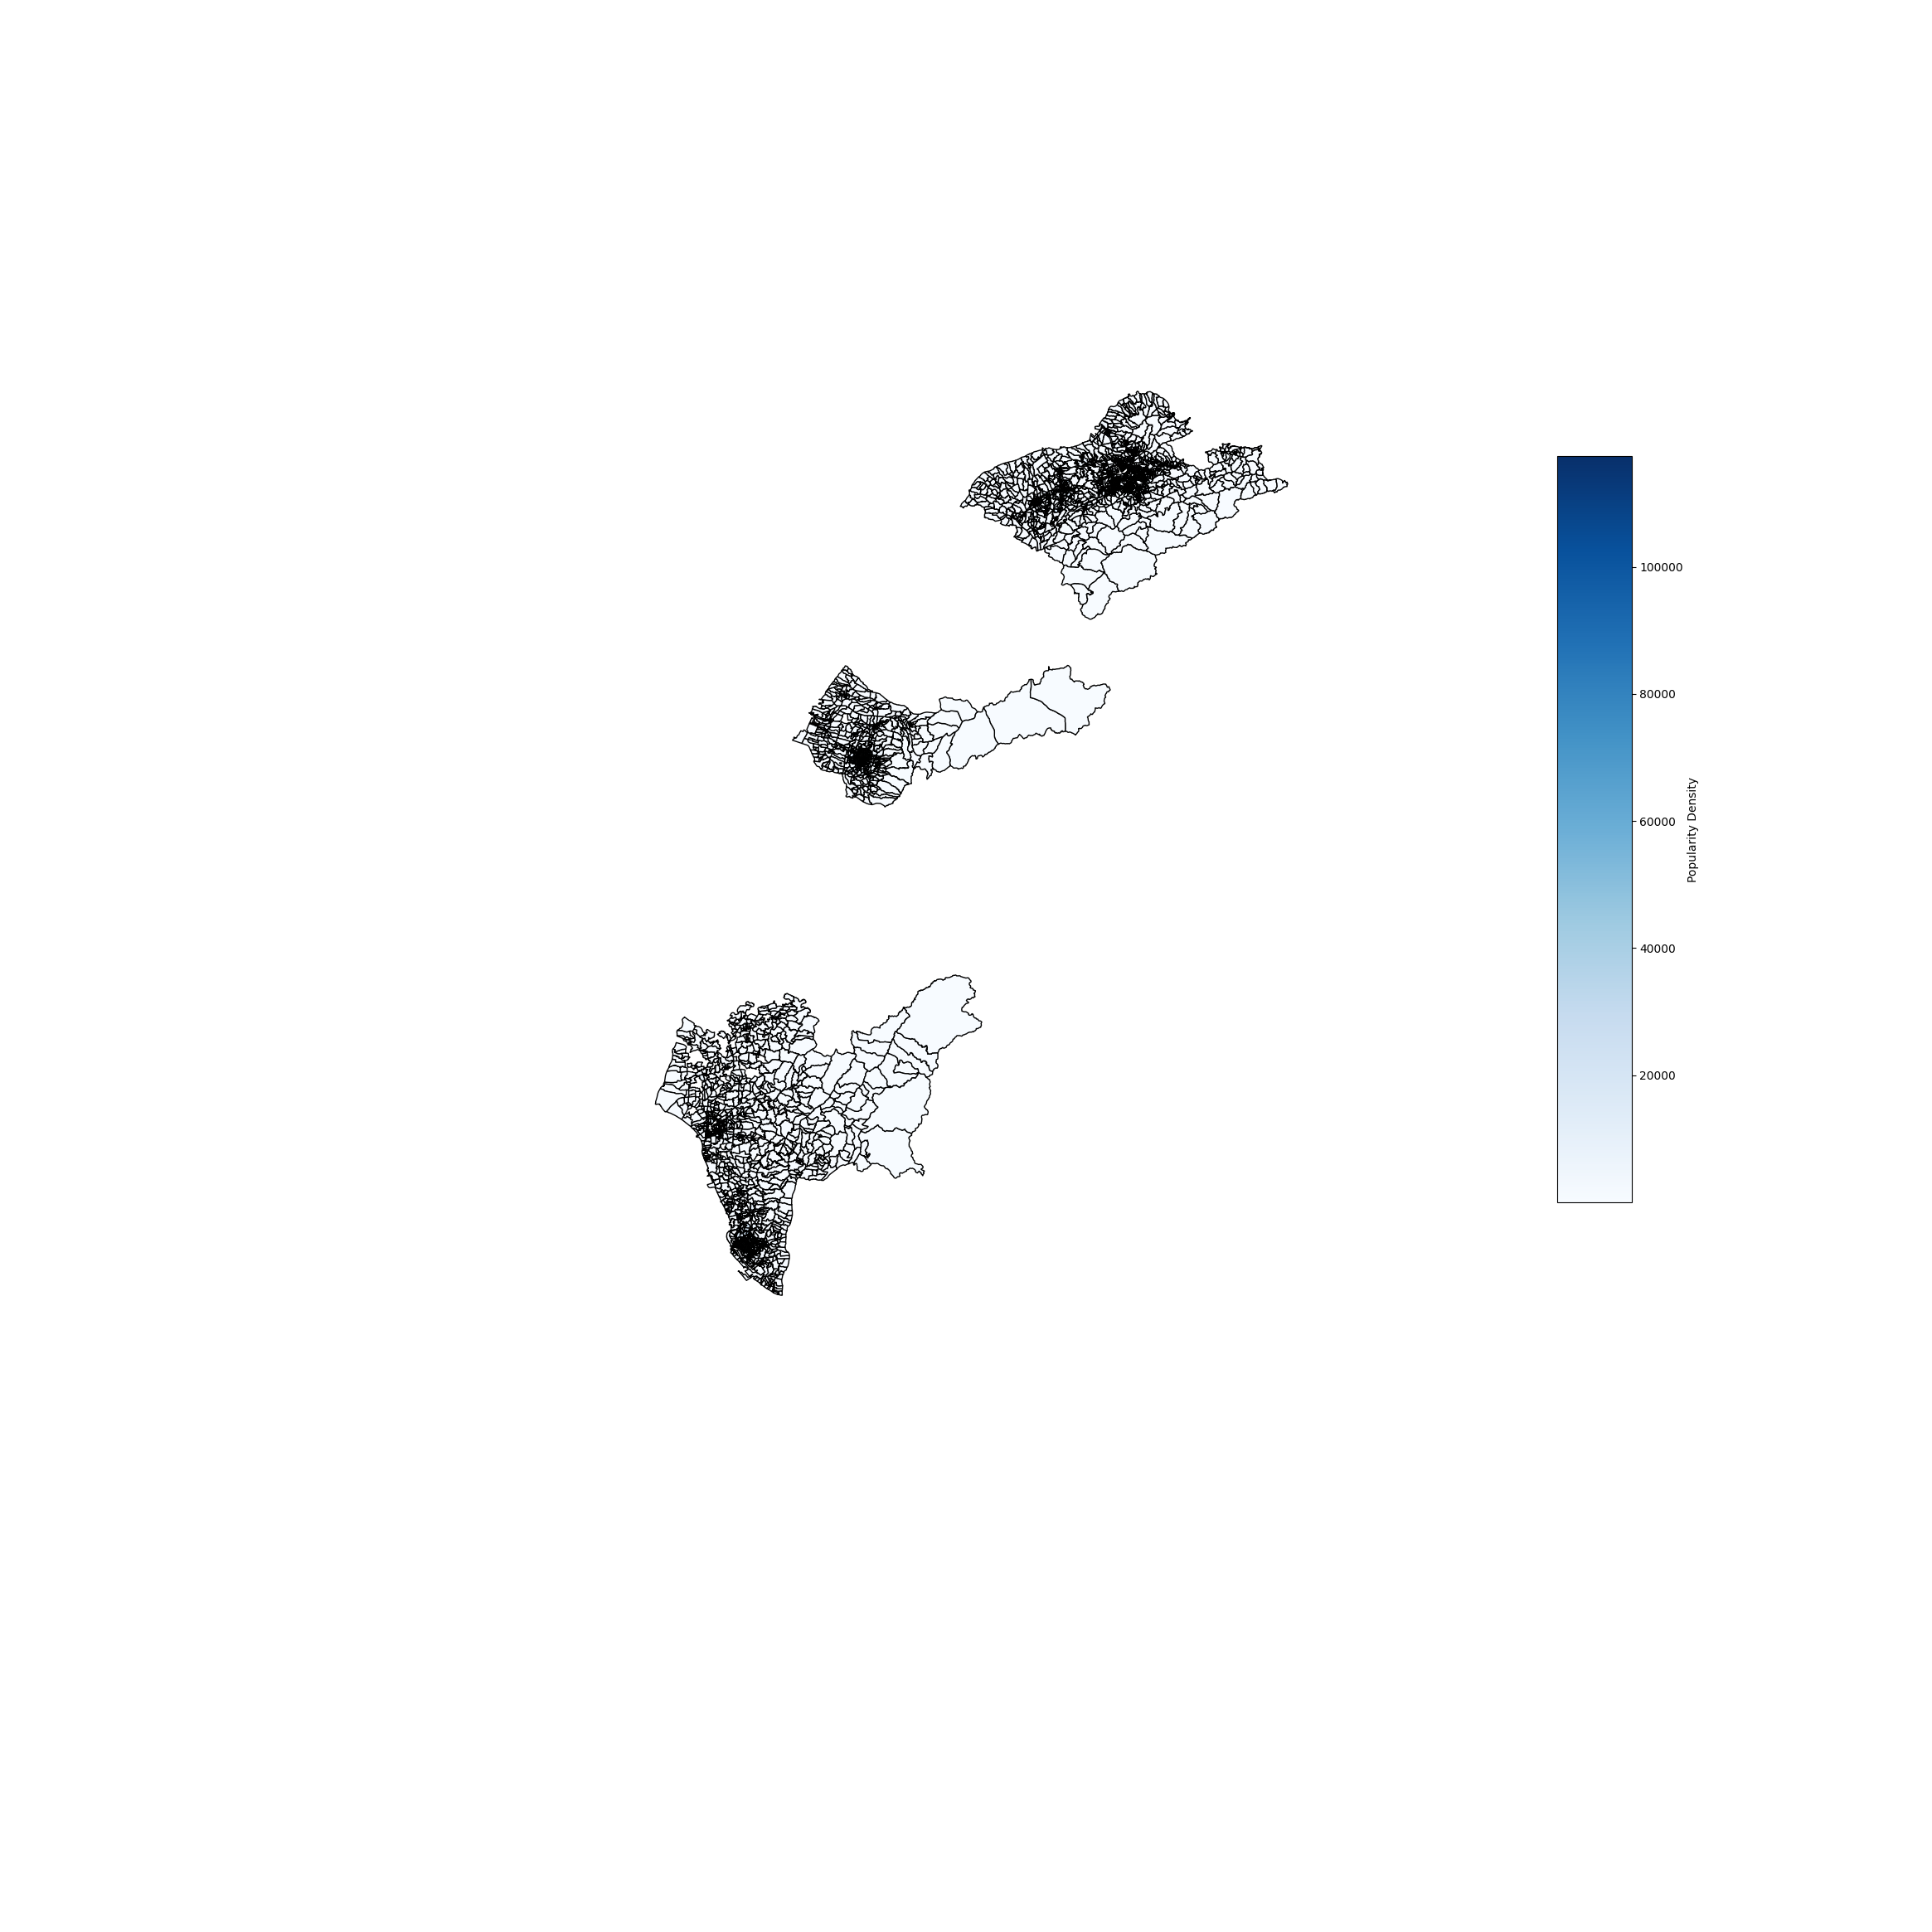

In [50]:
import cartopy.crs as ccrs
import matplotlib.colors as colors

# 台灣附近的經緯度範圍
taiwan_extent = [118, 124, 20.5, 26.5]

# 創建 colorbar
norm = colors.Normalize(vmin=six_metros_gdf['人口密度'].min(), vmax=six_metros_gdf['人口密度'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='Blues')

# 繪製地圖
fig = plt.figure(figsize=(30, 30))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(taiwan_extent, crs=ccrs.PlateCarree())
ax.axis('off')

# 繪製地理數據
six_metros_gdf.plot(column='人口密度', ax=ax, legend=False, cmap='Blues', linewidth=1, edgecolor='black')

# 添加 colorbar 在地圖內部
cbar_ax = fig.add_axes([0.75, 0.4, 0.03, 0.3])  # [left, bottom, width, height]
plt.colorbar(cbar, cax=cbar_ax, orientation='vertical', label='Popularity Density')

# 保存地圖為 PNG 圖像，確保沒有邊框
plt.savefig('popularity_village.png', bbox_inches='tight', pad_inches=0, transparent=True)

# 顯示地圖
plt.show()